In [1]:
from __future__ import division, unicode_literals, print_function
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np, pandas as pd
import os.path, os, sys, json
import math
from math import sqrt
plt.rcParams.update({'font.size': 18, 'figure.figsize': [10.0, 8.0]})
workdir=%pwd
print (workdir)

/Users/coralie/Desktop/Move/SI-Lipase-Structure-Factors/twobody/noswap


## Plot PMF

/Users/coralie/Desktop/Move/test/twobody/noswap/mc/data


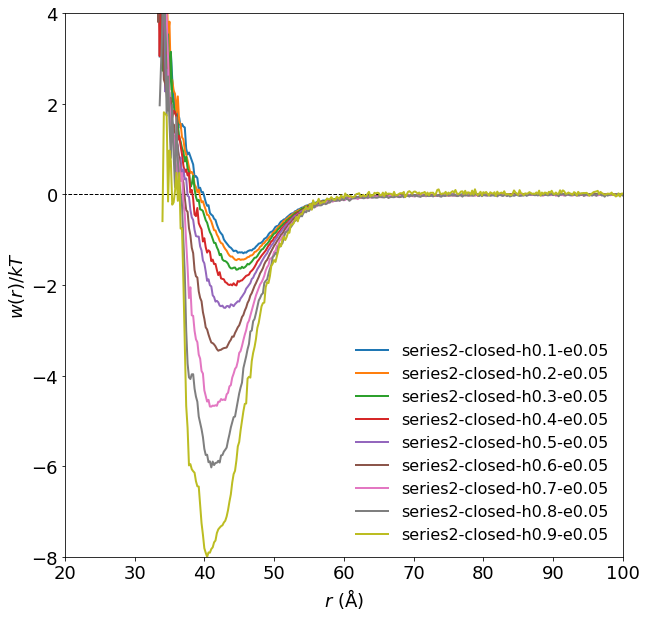

In [43]:
%cd $workdir/mc/data

series = "series2"
structurelist = ["closed"]
factlist = [0.05]
hlist = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

outprint1=[]
outprint2=[]
plt.plot((0,100),(0,0),'k--',lw=1.0)

for structure in structurelist:
    for fact in factlist:
        for hstr in hlist:
            pfx = str(series)+'-'+str(structure)+'-h'+str(hstr)+'-e'+str(fact)
            %cd -q $pfx

            rdffile="rdf.dat"

            r, g = np.loadtxt(rdffile, unpack=True)         # Load rdf file
            av1=()   
            av2=list(av1)                                      
            for i in np.arange(-20,-1,1):                   # Shift = average of the 20 last values of g 
                av2.append(g[i])
            av3 = sum(av2)/len(av2)  
            g1 = g/av3                                      # Normalized g(r)
            w1 = -np.log(g1)                                # Normalized w(r)

            def b2(x,w):                                    # B2 calculation (here x is the distance)
                inte  = -2*math.pi*(np.exp(-w)- 1)*x**2     # Integration of w(r)
                b2_hc = 2 * math.pi / 3 *(27.8*2)**3        # Hard sphere B2 
                return (np.trapz(inte, x)+b2_hc)/b2_hc      # Normalized B2
            
            plt.plot( r, w1, lw=2.0, label=pfx)
            
            outprint1.append(hstr) 
            outprint2.append(b2(r,w1))

            %cd -q ../

%cd -q $workdir/mc/data
pfx2 = str(series)+'-'+str(structure)+'-e'+str(fact)
b2file = '../'+"b2-"+pfx2+".dat"  
np.savetxt(b2file, np.transpose((outprint1,outprint2)))      # Saves B2 in .dat file
    
plt.rcParams.update({'font.size': 18, 'figure.figsize': [10.0, 10.0]})
plt.xlim(20,100)
plt.ylim(-8,4)
plt.xlabel("$r$ ($\mathrm{\AA}$)")
plt.ylabel("$w(r)/kT$")
plt.legend(frameon=False,fontsize=16)


%cd -q $workdir/mc/data

## Plot B2

/Users/coralie/Desktop/Move/test/twobody/noswap/mc/data


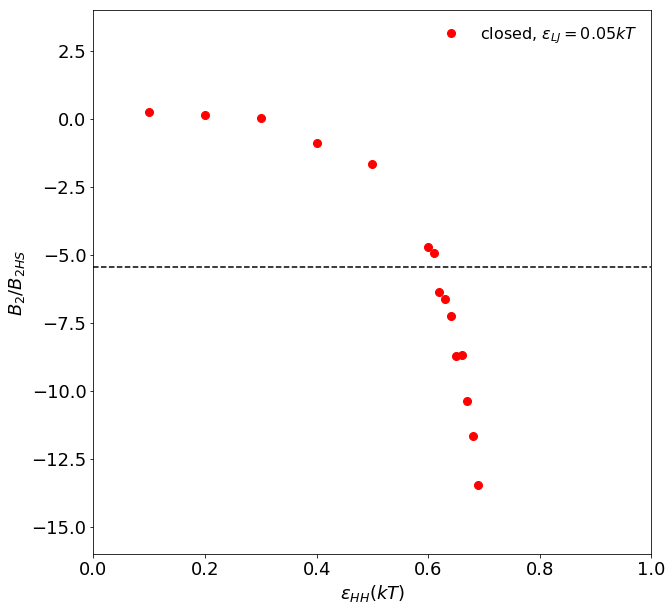

In [26]:
%cd $workdir/mc/data

series = "series2"
structurelist = ["closed"]
factlist = [0.05]

for structure in structurelist:
    for fact in factlist:
        pfx2 = str(series)+'-'+str(structure)+'-e'+str(fact)

        h,b = np.loadtxt('../'+"b2-"+pfx2+".dat", unpack=True)

        if structure=="closed":  
            mec='r'      
        if structure=="open":
            mec='b'
        if fact==0.05:
            mfc=mec
        if fact==0.005:
            mfc='None'
            
        plt.plot(h,b,ls='None', marker='o',ms=8, mfc=mfc, mec=mec, alpha=1.0, label=str(structure)+", $\epsilon_{LJ}=$"+str(fact)+"$kT$")

plt.plot((0.0, 1.0), (-5.44,-5.44), 'k--')
plt.xlabel("$\epsilon_{HH} (kT)$")
plt.ylabel("$B_2/B_{2HS}$")
plt.legend(frameon=False,fontsize=16)
plt.xlim(0.0,1.0)
plt.ylim(-16.0, 4.0)

%cd -q $workdir/mc/data

## B2 histogram

Text(0, 0.5, '$B_2/B_{2HS}$ simulation - $B_2/B_{2HS}$ experiments')

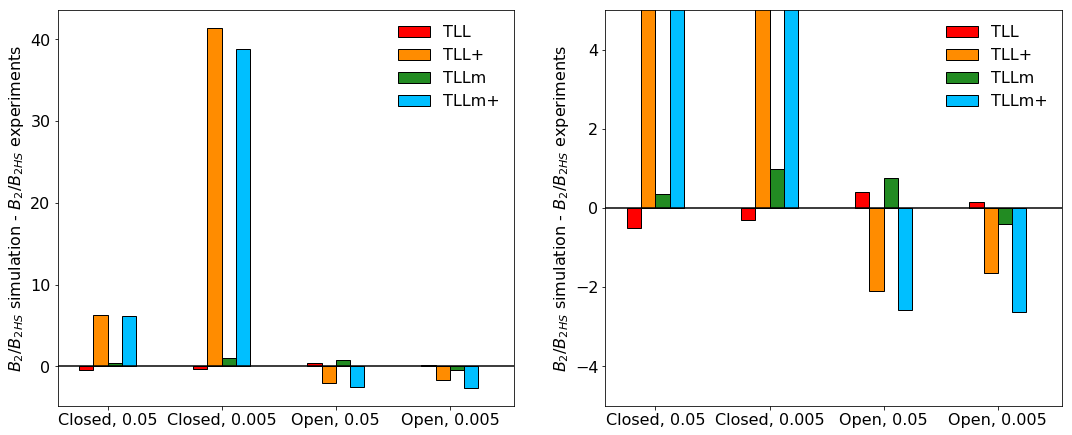

In [6]:
plt.rcParams.update({'font.size': 16, 'figure.figsize': [18.0, 16.0]})

label = ["Closed, 0.05", "Closed, 0.005", "Open, 0.05", "Open, 0.005"]

# Position of bars
x1 =[1, 5, 9, 13]
x2 = [1.5, 5.5, 9.5, 13.5]
x3 =[2, 6, 10, 14]
x4 =[2.5, 6.5, 10.5, 14.5]
xmid =[1.75, 5.75, 9.75, 13.75]

# Values of simulated B2 - experimental B2
y1 = [-0.4971, -0.28876, 0.413, 0.157]                            #TLL
y2 = [6.27066, 41.3387, -2.098, -1.635]                           #TLL+
y3 = [0.35903, 0.990605, 0.75, -0.412]                            #TLLm
y4 = [6.0908899778, 38.8756321124, -2.583787993, -2.637950762]    #TLLm+

# Full-scale figure
plt.subplot(2,2,1)
plt.bar(x1,y1,width=0.5,align='center',color='red', edgecolor='black', label="TLL")
plt.bar(x2,y2,width=0.5,align='center',color='darkorange', edgecolor='black',label="TLL+")
plt.bar(x3,y3,width=0.5,align='center',color='forestgreen', edgecolor='black',label="TLLm")
plt.bar(x4,y4,width=0.5,align='center',color='deepskyblue', edgecolor='black',label="TLLm+")

plt.xticks(xmid,label)
plt.plot((0,16),(0,0),'k-')
plt.xlim(0,16)
plt.legend(loc=0,frameon=False)
plt.ylabel("$B_2/B_{2HS}$ simulation - $B_2/B_{2HS}$ experiments")

# Zoom-in
plt.subplot(2,2,2)
plt.bar(x1,y1,width=0.5,align='center',color='red', edgecolor='black', label="TLL")
plt.bar(x2,y2,width=0.5,align='center',color='darkorange', edgecolor='black',label="TLL+")
plt.bar(x3,y3,width=0.5,align='center',color='forestgreen', edgecolor='black',label="TLLm")
plt.bar(x4,y4,width=0.5,align='center',color='deepskyblue', edgecolor='black',label="TLLm+")

plt.xticks(xmid,label)
plt.plot((0,16),(0,0),'k-')
plt.xlim(0,16)
plt.ylim(-5,5)
plt.legend(loc=0,frameon=False)
plt.ylabel("$B_2/B_{2HS}$ simulation - $B_2/B_{2HS}$ experiments")